# Title: Customer Segment 

<h1 style="font-weight: bold; color: white;">HANNAN MUZAMMIL</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/han023) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hannanmuzammil)

### **Meta-Data (About Dataset)**
#### Context
A company that sells some of the product, and you want to know how well does the selling performance of the product. You have the data that can we analyze, but what kind of analysis that we can do? Well, we can segment customers based on their buying behavior on the market.
Keep in mind that the data is really huge, and we can not analyze it using our bare eyes. We will use machine learning algorithms and the power of computing for it.

This project will show you how to cluster customers on segments based on their behavior using the K-Means algorithm in Python.
I hope that this project will help you on how to do customer segmentation step-by-step from preparing the data to cluster it.

#### Acknowledgements:
This dataset has been referred from UCI ML Repository:
https://archive.ics.uci.edu/ml/datasets/online+retail

#### Objective:
1. Understand the Dataset & cleanup (if required).
2. Build a clustering model to segment the customer-based similarity.
3. Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.









Steps
1. Data Preparation
    * UsetheCustomer Segmentation Dataset (provided or from a public source).
    * Perform RFMAnalysis:
        * Calculate Recency, Frequency, and Monetary value for each customer.
    * Normalize the RFM features using Min-Max Scaling.
2. Apply Clustering Algorithms
    * Implement K-Means Clustering:
    * Determine the optimal number of clusters using the Elbow Method or Silhouette Score.
    * Explore DBSCAN for clustering based on density.
3. Visualization and Insights
    * Visualize the clusters using 2D or 3D plots (e.g., PCA or t-SNE for dimensionality reduction).
    * Analyze the characteristics of each cluster and suggest personalized marketing strategies for each group.

In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_excel('OnlineRetail.xlsx')

# print the first 5 rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory Data Analysis (EDA) and data preprocessing

### Explore each Column

In [3]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# data shpae
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# Checking for missing values in each column of the dataset
# This helps identify columns that may need imputation or handling before further analysis
print("Missing Values per Column:")
df.isnull().sum()

Missing Values per Column:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [9]:
# Missing value percentages
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


The presence of missing values ​​in the data set indicates a structural disorder and must be handled with appropriate methods.

Missing data can be deleted from the dataset or filled with appropriate data, depending on the situation. However, deleting missing data means losing other data in the deleted rows or columns. In the process of filling in missing data, since we will make a synthetic input to the data set, filling operations may manipulate the distributions in the data set.

The reason why missing data occurs should be evaluated sensitively, and how it will be handled should be decided appropriately as a result of this evaluation.

Cleansing

In [10]:
# Drop Description, StockCode columns
df.drop(['Description', 'StockCode'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Quantity     541909 non-null  int64         
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
 5   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.8+ MB


In [12]:
# Drop rows with negative Quantity
df = df[df['Quantity'] > 0]

In [13]:
# Drop rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

In [14]:
# Remove outliers in Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1 
df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))] 

In [15]:
# Remove outliers in UnitPrice
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['UnitPrice'] >= (Q1 - 1.5 * IQR)) & (df['UnitPrice'] <= (Q3 + 1.5 * IQR))]

In [16]:
# Drop rows with missing CustomerID
data_cleaned = df.dropna(subset=['CustomerID'])

In [17]:
data_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,326440.000000,326440,326440.000000,326440.000000
mean,5.755030,2011-07-12 05:17:09.536147968,2.608784,15350.977141
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,2.000000,2011-04-07 12:38:00,1.250000,14049.000000
50%,4.000000,2011-08-02 14:04:00,1.950000,15296.000000
75%,10.000000,2011-10-23 15:11:00,3.750000,16871.500000
max,23.000000,2011-12-09 12:50:00,8.500000,18287.000000
std,4.641744,NaN,1.991053,1703.889434


In [18]:
# Check for duplicates
print(f"Duplicate rows: {data_cleaned.duplicated().sum()}")

Duplicate rows: 131831


In [19]:
# Drop duplicates
data_cleaned = df.drop_duplicates()

### Feature Engineering

In [20]:
# Add TotalPrice
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [21]:
data_cleaned.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50


In [22]:
data_cleaned.shape

(231039, 7)

This dataset contains details of sales transactions made on an e-commerce platform. Each row corresponds to a sales transaction of a product. Below are descriptions of the variables:

1. InvoiceNo (Invoice Number)
    * Type: object Description: A unique identification number for the sales transaction. Each invoice can contain multiple product sales. Missing values ​​may indicate that the invoice record is not complete. StockCode
    * Type: object Description: Identification number of the sold product used in stock. Missing values ​​may indicate that stock information for certain products is missing.

2. Description
    * Type: object Description: Brief description of the item being sold. Missing values ​​may indicate that the description of some products has not been recorded in the system.

3. Quantity
    * Type: float64 Description: It refers to the amount of the product sold. Negative values ​​may represent returns. Missing values ​​may indicate that quantity information is missing for some sales.

4. InvoiceDate
    * Type: datetime64[ns] Description: Date and time when the sales transaction was made. This data is important for time series analysis. Missing values ​​may indicate that date information for certain sales was not recorded.

5. UnitPrice
    * Type: float64 Description: Unit price of the product sold. Negative or zero values ​​may indicate system errors or special offers. Missing values ​​may indicate that some products are missing price information.

6. CustomerID
    * Type: float64 Description: Unique identification number of the customer who completed the sale transaction. Missing values ​​may indicate anonymous customers or transactions where no customer information was entered.

7. Country
    * Type: object Description: Country where the sales transaction takes place or where the customer is located. Missing values ​​may indicate that country information was not recorded for some transactions.

### Visualize Key Features

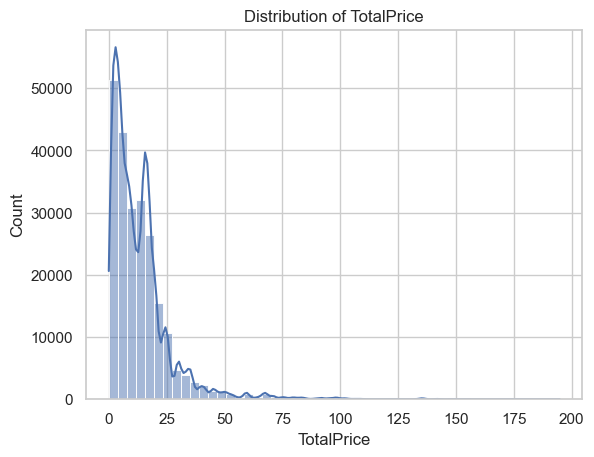

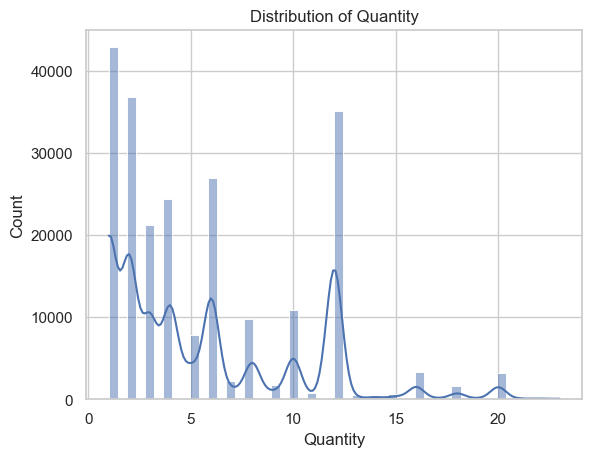

In [23]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

sns.histplot(data_cleaned['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of TotalPrice')
plt.show()

sns.histplot(data_cleaned['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()


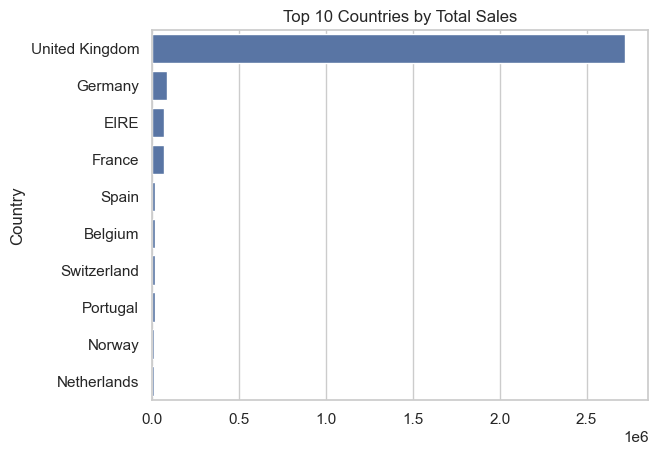

In [24]:
country_sales = data_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title('Top 10 Countries by Total Sales')
plt.show()

<Axes: ylabel='Country'>

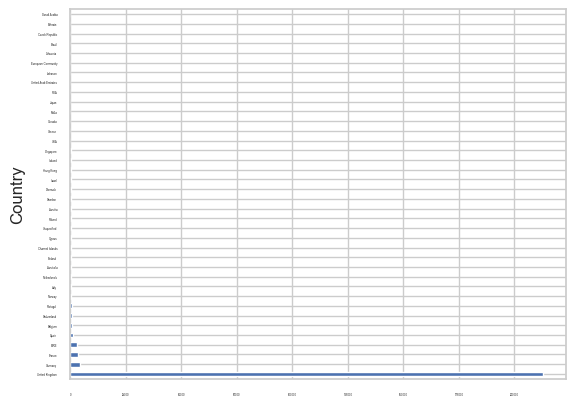

In [25]:
# Frequency of each country
data_cleaned['Country'].value_counts().plot(kind='barh', fontsize=2)

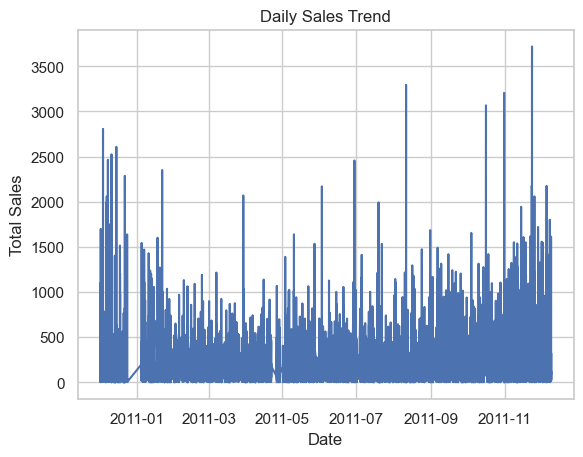

In [26]:
daily_sales = data_cleaned.groupby('InvoiceDate')['TotalPrice'].sum()
plt.plot(daily_sales)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

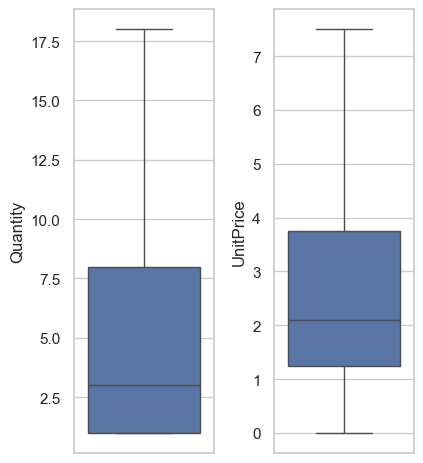

In [27]:
# Boxplot of Quantity and UnitPrice
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=df, showfliers=False)

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=df, showfliers=False)

plt.tight_layout()


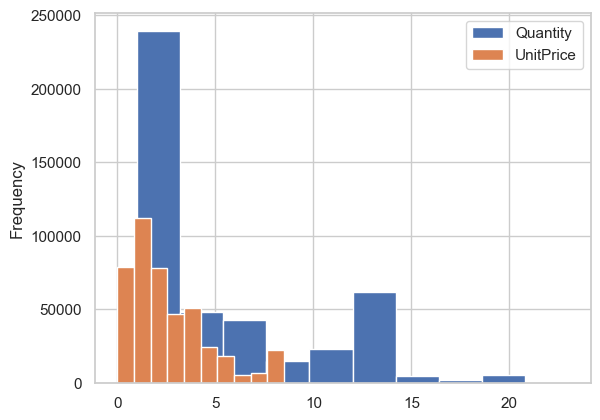

In [28]:
# Histogram of Quantity and UnitPrice
df['Quantity'].plot(kind='hist', bins=10)
df['UnitPrice'].plot(kind='hist', bins=10)

plt.legend(['Quantity', 'UnitPrice'])

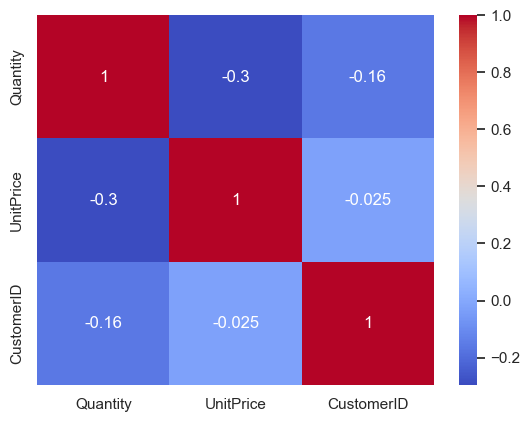

In [29]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Data Preparation for RFM Analysis

In [30]:
# Define snapshot date for recency calculation
snapshot_date = data_cleaned['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                    # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Display RFM metrics
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12347.0           2         86   1835.15
12348.0         249          1     17.00
12349.0          19         35    663.19
12350.0         310          7    113.80
12352.0          36         55    964.44


In [31]:
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm.columns, index=rfm.index)


## Apply Clustering Algorithms 

K-Means Clustering

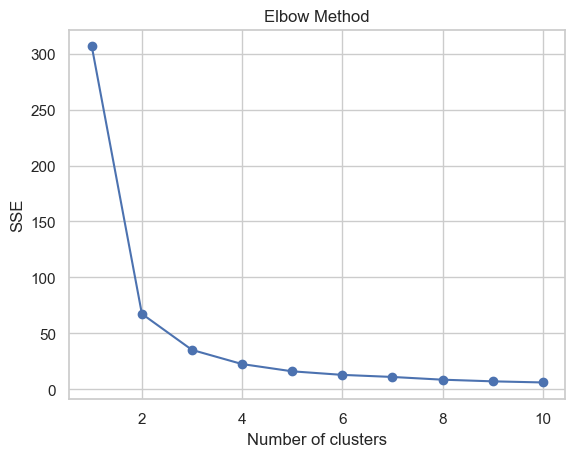

In [32]:
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


Silhouette Score

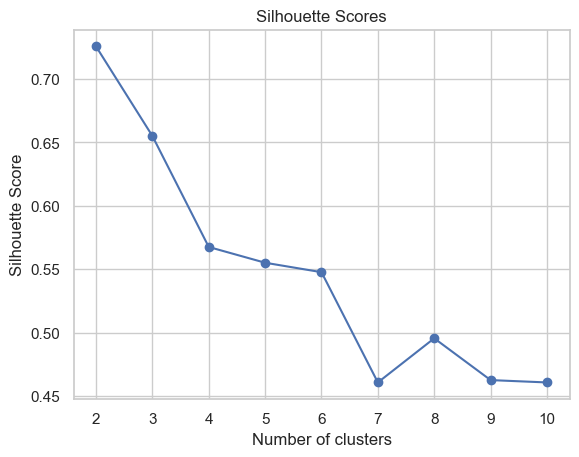

In [33]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    sil_scores.append(silhouette_score(rfm_scaled, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


Fit K-Means

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm['Cluster'].value_counts())


Cluster
0    2097
2     988
1     605
3     480
Name: count, dtype: int64


DBSCAN Clustering

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
print(rfm['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    4169
-1       1
Name: count, dtype: int64


## Visualization and Insights

Visualize Clusters

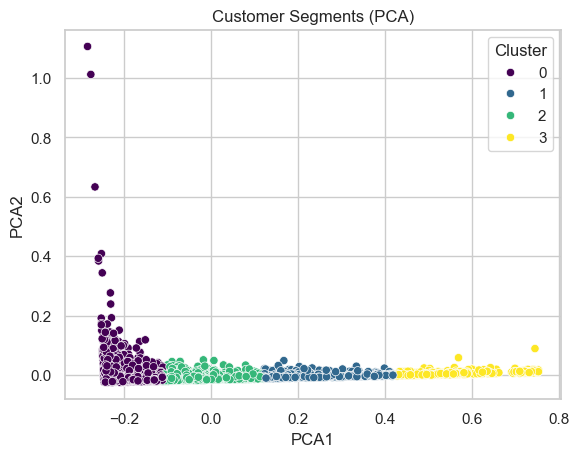

In [36]:
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments (PCA)')
plt.show()


Analyze Clusters

In [37]:
cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)

# Suggest personalized marketing strategies for each cluster
for cluster_id, row in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}:")
    print(f"  - Recency: {row['Recency']:.2f}")
    print(f"  - Frequency: {row['Frequency']:.2f}")
    print(f"  - Monetary: {row['Monetary']:.2f}")


            Recency  Frequency    Monetary  DBSCAN_Cluster      PCA1      PCA2
Cluster                                                                       
0         20.298999  71.752980  954.720225       -0.000477 -0.195399  0.002754
1        191.844628  18.479339  244.537820        0.000000  0.264919 -0.001871
2         82.443320  27.034413  398.934273        0.000000 -0.028346 -0.007856
3        308.695833  13.027083  171.777646        0.000000  0.578087  0.006498
Cluster 0:
  - Recency: 20.30
  - Frequency: 71.75
  - Monetary: 954.72
Cluster 1:
  - Recency: 191.84
  - Frequency: 18.48
  - Monetary: 244.54
Cluster 2:
  - Recency: 82.44
  - Frequency: 27.03
  - Monetary: 398.93
Cluster 3:
  - Recency: 308.70
  - Frequency: 13.03
  - Monetary: 171.78


In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Add t-SNE results to the DataFrame
rfm['t-SNE1'] = rfm_tsne[:, 0]
rfm['t-SNE2'] = rfm_tsne[:, 1]

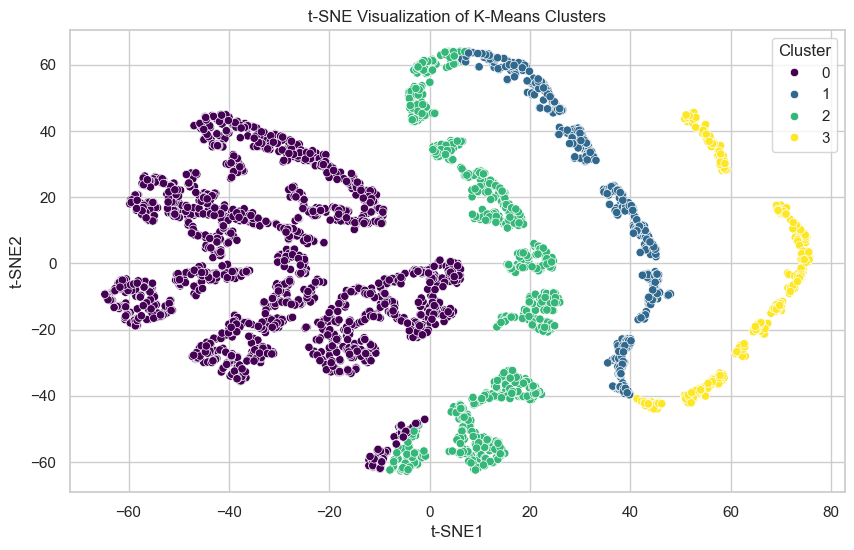

In [40]:
# Scatter plot for K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='t-SNE1',
    y='t-SNE2',
    hue='Cluster',
    palette='viridis',
    data=rfm,
    legend='full'
)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Cluster')
plt.show()


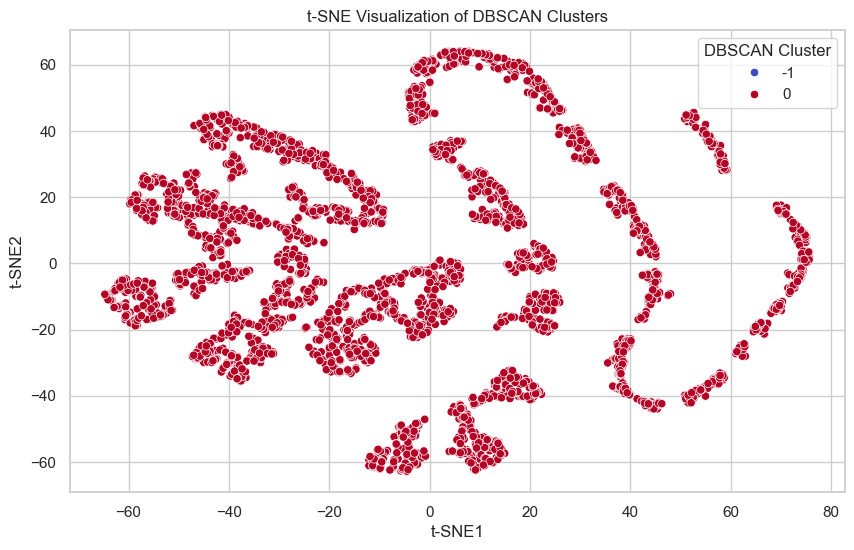

In [41]:
# Scatter plot for DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='t-SNE1',
    y='t-SNE2',
    hue='DBSCAN_Cluster',
    palette='coolwarm',
    data=rfm,
    legend='full'
)
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='DBSCAN Cluster')
plt.show()
